<a href="https://colab.research.google.com/github/Grupo242022/EyCD/blob/main/Entregable_Parte_2_2022_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

# **Exploración y Curación de Datos**

## Entregable # 2 Parte 2 - Ejercicio 1

## GRUPO Nº24

## INTEGRANTES:
   - Clarisa Manzone
   - Nico Rosales
   - Daniel Rubio
   - Diana Fonnegra   
----

# Trabajo práctico entregable - parte 2


En el ejercicio 2 de la parte 1 del entregable seleccionaron las filas y columnas relevantes al problema de predicción de precios de una propiedad e imputaron los valores faltantes de las columnas `Suburb` y las columnas obtenidas a partir del conjunto de datos `airbnb`.

En esta notebook, **se utilizará resultado de dichas operaciones.** que fue guardado en un archivo (Ejercicio 3 entregable 1). 


# Rta//:

### Carga del conjunto e importando librerías útiles.

In [1]:
import matplotlib.pyplot as plt
import numpy
import pandas as pd

import seaborn as sns
sns.set_context('talk')

pd.set_option('display.float_format', lambda x: '%.2f' % x)
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
pd.options.display.max_columns = None

In [3]:
# Cargamos la BBDD creada en el practico anterior
melb_df = pd.read_csv('https://github.com/Grupo242022/EyCD/blob/main/melb_data_extended.csv?raw=true')

melb_df[:1].T

,0
Suburb,Abbotsford
Rooms,2
Type,h
Price,1480000.00
Date,3/12/2016
Distance,2.50
Postcode,3067.00
Bathroom,1.00
Car,1.00
Landsize,202.00


## Ejercicio 1: Encoding

1. Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, **excepto** `BuildingArea` y `YearBuilt`, que volveremos a imputar más adelante.

2. Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

Algunas opciones:
  1. Utilizar `OneHotEncoder` junto con el parámetro `categories` para las variables categóricas y luego usar `numpy.hstack` para concatenar el resultado con las variables numéricas. 
  2. `DictVectorizer` con algunos pasos de pre-proceso previo.

Recordar también que el atributo `pandas.DataFrame.values` permite acceder a la matriz de numpy subyacente a un DataFrame.


# Rta//:
### * Para realizar este proceso haremos uso de `DictVectorizer` el cual codifica automáticamente todos las columnas categóricas y los combinan con los datos numéricos existentes.

In [4]:
# Consulta de los tipos de datos:
melb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12138 entries, 0 to 12137
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Suburb               12138 non-null  object 
 1   Rooms                12138 non-null  int64  
 2   Type                 12138 non-null  object 
 3   Price                12138 non-null  float64
 4   Date                 12138 non-null  object 
 5   Distance             12138 non-null  float64
 6   Postcode             12138 non-null  float64
 7   Bathroom             12138 non-null  float64
 8   Car                  12138 non-null  float64
 9   Landsize             12138 non-null  float64
 10  BuildingArea         6316 non-null   float64
 11  YearBuilt            7243 non-null   float64
 12  CouncilArea          10940 non-null  object 
 13  Lattitude            12138 non-null  float64
 14  Longtitude           12138 non-null  float64
 15  Propertycount        12138 non-null 

### * Filtramos el conjunto de datos seleccionando tan solo las variables de tipo objeto y realizamos algunas consultas básicas:

In [5]:
# Objetos de melb_df:
melb_df_mod=melb_df.select_dtypes(include=['object'])
melb_df_mod

,Suburb,Type,Date,CouncilArea
0,Abbotsford,h,3/12/2016,Yarra
1,Abbotsford,h,4/02/2016,Yarra
2,Abbotsford,h,4/03/2017,Yarra
3,Abbotsford,h,4/03/2017,Yarra
4,Abbotsford,h,4/06/2016,Yarra
...,...,...,...,...
12133,Westmeadows,h,26/08/2017,NaN
12134,Wheelers Hill,h,26/08/2017,NaN
12135,Williamstown,h,26/08/2017,NaN
12136,Williamstown,h,26/08/2017,NaN


In [6]:
# Consulta de datos nulos:
melb_df.select_dtypes(include=['object']).nunique()

Suburb         304
Type             3
Date            58
CouncilArea     31
dtype: int64

### * Transformación del conjunto de datos (listas/feature-value a vectores) con el objetivo de enmascarar los datos categóricos.

In [7]:
feature_dict = list(melb_df.T.to_dict().values())
# Consulta de los dos primeros registros
feature_dict[1]

{'Bathroom': 1.0,
 'BuildingArea': 79.0,
 'Car': 0.0,
 'CouncilArea': 'Yarra',
 'Date': '4/02/2016',
 'Distance': 2.5,
 'Landsize': 156.0,
 'Lattitude': -37.8079,
 'Longtitude': 144.9934,
 'Postcode': 3067.0,
 'Price': 1035000.0,
 'Propertycount': 4019.0,
 'Rooms': 2,
 'Suburb': 'Abbotsford',
 'Type': 'h',
 'YearBuilt': 1900.0,
 'airbnb_price_mean': 130.62403100775194,
 'airbnb_price_median': 100.0,
 'airbnb_record_count': 258.0,
 'zipcode': 3067.0}

### * Aplicamos el Encoding haciendo uso de DictVectorizer

In [8]:
# Encoding the data using DictVectorizer

from sklearn.feature_extraction import DictVectorizer

vec = DictVectorizer(sparse=False) # Instantiating the DictVectorizer object
feature_matrix = vec.fit_transform(feature_dict) # Data_encoded


In [9]:
# Converting encoded data into pandas dataframe
# columnas=vec.get_feature_names()
df_melb_enc = pd.DataFrame(feature_matrix, columns=vec.get_feature_names())
df_melb_enc.head(1)

,Bathroom,BuildingArea,Car,CouncilArea,CouncilArea=Banyule,CouncilArea=Bayside,CouncilArea=Boroondara,CouncilArea=Brimbank,CouncilArea=Cardinia,CouncilArea=Casey,CouncilArea=Darebin,CouncilArea=Frankston,CouncilArea=Glen Eira,CouncilArea=Greater Dandenong,CouncilArea=Hobsons Bay,CouncilArea=Hume,CouncilArea=Kingston,CouncilArea=Knox,CouncilArea=Manningham,CouncilArea=Maribyrnong,CouncilArea=Maroondah,CouncilArea=Melbourne,CouncilArea=Melton,CouncilArea=Monash,CouncilArea=Moonee Valley,CouncilArea=Moreland,CouncilArea=Nillumbik,CouncilArea=Port Phillip,CouncilArea=Stonnington,CouncilArea=Unavailable,CouncilArea=Whitehorse,CouncilArea=Whittlesea,CouncilArea=Wyndham,CouncilArea=Yarra,CouncilArea=Yarra Ranges,Date=1/07/2017,Date=10/09/2016,Date=10/12/2016,Date=11/02/2017,Date=11/03/2017,Date=12/06/2016,Date=12/08/2017,Date=12/11/2016,Date=13/05/2017,Date=13/08/2016,Date=14/05/2016,Date=15/07/2017,Date=15/10/2016,Date=16/04/2016,Date=16/07/2016,Date=16/09/2017,Date=17/06/2017,Date=17/09/2016,Date=18/03/2017,Date=18/06/2016,Date=19/08/2017,Date=19/11/2016,Date=20/05/2017,Date=22/04/2017,Date=22/05/2016,Date=22/07/2017,Date=22/08/2016,Date=23/04/2016,Date=23/09/2017,Date=24/06/2017,Date=24/09/2016,Date=25/02/2017,Date=26/07/2016,Date=26/08/2017,Date=27/05/2017,Date=27/06/2016,Date=27/11/2016,Date=28/01/2016,Date=28/05/2016,Date=28/08/2016,Date=29/04/2017,Date=29/07/2017,Date=3/06/2017,Date=3/09/2016,Date=3/09/2017,Date=3/12/2016,Date=30/07/2016,Date=4/02/2016,Date=4/03/2017,Date=4/06/2016,Date=6/05/2017,Date=6/08/2016,Date=7/05/2016,Date=7/11/2016,Date=8/04/2017,Date=8/07/2017,Date=8/10/2016,Date=9/09/2017,Distance,Landsize,Lattitude,Longtitude,Postcode,Price,Propertycount,Rooms,Suburb=Abbotsford,Suburb=Aberfeldie,Suburb=Airport West,Suburb=Albanvale,Suburb=Albert Park,Suburb=Albion,Suburb=Alphington,Suburb=Altona,Suburb=Altona Meadows,Suburb=Altona North,Suburb=Armadale,Suburb=Ascot Vale,Suburb=Ashburton,Suburb=Ashwood,Suburb=Aspendale,Suburb=Aspendale Gardens,Suburb=Attwood,Suburb=Avondale Heights,Suburb=Balaclava,Suburb=Balwyn,Suburb=Balwyn North,Suburb=Bayswater,Suburb=Bayswater North,Suburb=Beaconsfield,Suburb=Beaconsfield Upper,Suburb=Beaumaris,Suburb=Bellfield,Suburb=Bentleigh,Suburb=Bentleigh East,Suburb=Berwick,Suburb=Black Rock,Suburb=Blackburn,Suburb=Blackburn North,Suburb=Blackburn South,Suburb=Bonbeach,Suburb=Boronia,Suburb=Box Hill,Suburb=Braybrook,Suburb=Briar Hill,Suburb=Brighton,Suburb=Brighton East,Suburb=Broadmeadows,Suburb=Brookfield,Suburb=Brooklyn,Suburb=Brunswick,Suburb=Brunswick East,Suburb=Brunswick West,Suburb=Bulleen,Suburb=Bundoora,Suburb=Burnley,Suburb=Burnside,Suburb=Burnside Heights,Suburb=Burwood,Suburb=Burwood East,Suburb=Cairnlea,Suburb=Camberwell,Suburb=Canterbury,Suburb=Carlton,Suburb=Carlton North,Suburb=Carnegie,Suburb=Caroline Springs,Suburb=Carrum,Suburb=Carrum Downs,Suburb=Caulfield,Suburb=Caulfield East,Suburb=Caulfield North,Suburb=Caulfield South,Suburb=Chadstone,Suburb=Chelsea,Suburb=Chelsea Heights,Suburb=Cheltenham,Suburb=Chirnside Park,Suburb=Clarinda,Suburb=Clayton,Suburb=Clayton South,Suburb=Clifton Hill,Suburb=Coburg,Suburb=Coburg North,Suburb=Collingwood,Suburb=Coolaroo,Suburb=Craigieburn,Suburb=Cranbourne,Suburb=Cranbourne North,Suburb=Cremorne,Suburb=Croydon,Suburb=Croydon Hills,Suburb=Croydon North,Suburb=Croydon South,Suburb=Dallas,Suburb=Dandenong,Suburb=Dandenong North,Suburb=Deepdene,Suburb=Deer Park,Suburb=Delahey,Suburb=Derrimut,Suburb=Diamond Creek,Suburb=Diggers Rest,Suburb=Dingley Village,Suburb=Docklands,Suburb=Doncaster,Suburb=Doncaster East,Suburb=Donvale,Suburb=Doreen,Suburb=Doveton,Suburb=Eaglemont,Suburb=East Melbourne,Suburb=Edithvale,Suburb=Elsternwick,Suburb=Eltham,Suburb=Eltham North,Suburb=Elwood,Suburb=Emerald,Suburb=Endeavour Hills,Suburb=Epping,Suburb=Essendon,Suburb=Essendon North,Suburb=Essendon West,Suburb=Fairfield,Suburb=Fawkner,Suburb=Ferntree Gully,Suburb=Fitzroy,Suburb=Fitzroy North,Suburb=Flemington,Suburb=Footscray,Suburb=Forest Hill,Suburb=Franks

### Consultamos los nombres resultantes de la transformación, así como las filas y columnas de df_melb_enc:

In [10]:
print(f'\nColumnas: \n{df_melb_enc.columns}')
{df_melb_enc.shape}
print(f'\nShape: \n{df_melb_enc.shape}')


Columnas: 
Index(['Bathroom', 'BuildingArea', 'Car', 'CouncilArea', 'CouncilArea=Banyule',
       'CouncilArea=Bayside', 'CouncilArea=Boroondara', 'CouncilArea=Brimbank',
       'CouncilArea=Cardinia', 'CouncilArea=Casey',
       ...
       'Suburb=Yarra Glen', 'Suburb=Yarraville', 'Type=h', 'Type=t', 'Type=u',
       'YearBuilt', 'airbnb_price_mean', 'airbnb_price_median',
       'airbnb_record_count', 'zipcode'],
      dtype='object', length=413)

Shape: 
(12138, 413)


## Ejercicio 2: Imputación por KNN

En el teórico se presentó el método `IterativeImputer` para imputar valores faltantes en variables numéricas. Sin embargo, los ejemplos presentados sólo utilizaban algunas variables numéricas presentes en el conjunto de datos. En este ejercicio, utilizaremos la matriz de datos codificada para imputar datos faltantes de manera más precisa.

1. Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.
2. Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?
3. Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.

### Rta//: * Imputación por KNN - `YearBuilt`

In [11]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

melb_data_mice = df_melb_enc.copy(deep=True)
mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
melb_data_mice[['YearBuilt','BuildingArea']] = mice_imputer.fit_transform(
    melb_data_mice[['YearBuilt', 'BuildingArea']])

In [12]:
mice_year_YB = melb_data_mice.YearBuilt.to_frame()
mice_year_YB['Imputation'] = 'KNN over YearBuilt'
melb_year_YB = melb_df.YearBuilt.dropna().to_frame()
melb_year_YB['Imputation'] = 'Original'

In [13]:
df_YB = pd.concat([mice_year_YB, melb_year_YB])
df_YB = df_YB.reset_index()
df_YB.drop(['index'], axis=1, inplace=True)

### * Gráfico de comparación de distribuciones de datos obtenidas con el método de imputación KNeighborsRegressor: `YearBuilt_modificado` vs .`YearBuilt_original`:

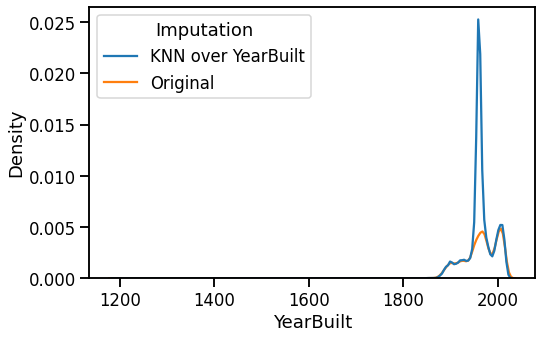

In [14]:
fig = plt.figure(figsize=(8, 5))
g = sns.kdeplot(data=df_YB, x='YearBuilt', hue='Imputation')

### * Imputación por KNN - `BuildingArea`:

In [15]:
mice_building_area = melb_data_mice.BuildingArea.to_frame()
mice_building_area['Imputation'] = 'KNN over BuildingArea'
melb_building_area = melb_df.BuildingArea.dropna().to_frame()
melb_building_area['Imputation'] = 'Original'
df_build = pd.concat([mice_building_area, melb_building_area])
df_build = df_build.reset_index()
df_build.drop(['index'], axis=1, inplace=True)

### * Gráfico de comparación de distribuciones de datos obtenidas con el método de imputación KNeighborsRegressor: `BuildingArea_modificado` vs .`BuildingArea_original`:

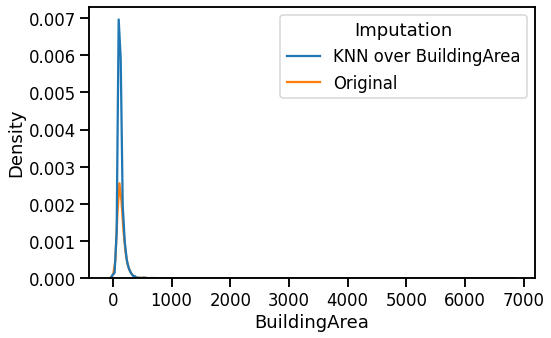

In [16]:
fig = plt.figure(figsize=(8, 5))
g = sns.kdeplot(data=df_build, x='BuildingArea', hue='Imputation')

 ### ¿Es necesario estandarizar o escalar los datos previamente?

 ### Rta//: analizando los gráficos, podemos notar que la curva correspondiente a la estimación por KNN, se muestra bastante alejada en cuanto al pico de la curva original. Es por esto que se estudiara el caso de escalado/estandarizado de los datos...

### * Combinación de RobustScaler() - Imputación por KNN - `YearBuilt`:

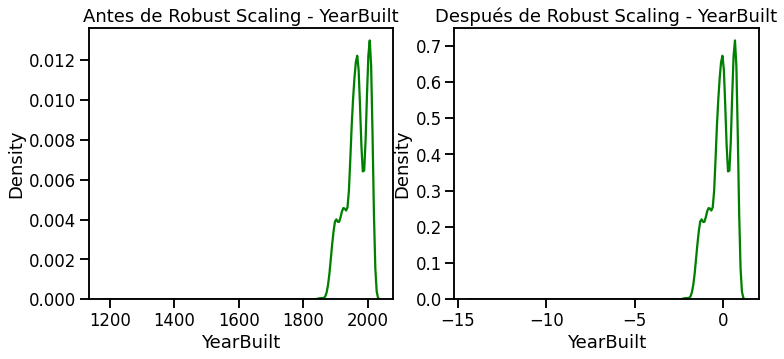

In [18]:
from sklearn import preprocessing 

melb_data_s = df_melb_enc.copy(deep=True)
scaler = preprocessing.RobustScaler()
robust_df_YB = scaler.fit_transform(melb_data_s)
robust_df_YB = pd.DataFrame(robust_df_YB, columns=vec.get_feature_names())

fig,(ax1, ax2) = plt.subplots(ncols = 2, figsize =(12, 5)) 
ax1.set_title('Antes de Robust Scaling - YearBuilt') 
  
sns.kdeplot(melb_data_s['YearBuilt'], ax = ax1, color ='g') 
ax2.set_title('Después de Robust Scaling - YearBuilt')  
sns.kdeplot(robust_df_YB['YearBuilt'], ax = ax2, color ='green') 

plt.show() 





In [19]:
imputer_YB = IterativeImputer(random_state=0, estimator=KNeighborsRegressor(),n_nearest_features=5)
prueba_YB = robust_df_YB.values.copy().reshape(-1,1)
scaled_knn_YB = imputer_YB.fit_transform(prueba_YB)

In [20]:
scaled_i = scaled_knn_YB.reshape(12138, 413)

In [25]:
YB_area2 = pd.DataFrame(scaler.inverse_transform(scaled_i), columns=vec.get_feature_names())
YB_area2['Imputation'] = 'KNN over YearBuilt - Robust'

df_YB2 = pd.concat([df_YB, YB_area2])
df_YB2 = df_YB2.reset_index()
df_YB2.drop(['index', 'level_0'], axis=1, inplace=True)
df_YB2.head(1)

,YearBuilt,Imputation,Bathroom,BuildingArea,Car,CouncilArea,CouncilArea=Banyule,CouncilArea=Bayside,CouncilArea=Boroondara,CouncilArea=Brimbank,CouncilArea=Cardinia,CouncilArea=Casey,CouncilArea=Darebin,CouncilArea=Frankston,CouncilArea=Glen Eira,CouncilArea=Greater Dandenong,CouncilArea=Hobsons Bay,CouncilArea=Hume,CouncilArea=Kingston,CouncilArea=Knox,CouncilArea=Manningham,CouncilArea=Maribyrnong,CouncilArea=Maroondah,CouncilArea=Melbourne,CouncilArea=Melton,CouncilArea=Monash,CouncilArea=Moonee Valley,CouncilArea=Moreland,CouncilArea=Nillumbik,CouncilArea=Port Phillip,CouncilArea=Stonnington,CouncilArea=Unavailable,CouncilArea=Whitehorse,CouncilArea=Whittlesea,CouncilArea=Wyndham,CouncilArea=Yarra,CouncilArea=Yarra Ranges,Date=1/07/2017,Date=10/09/2016,Date=10/12/2016,Date=11/02/2017,Date=11/03/2017,Date=12/06/2016,Date=12/08/2017,Date=12/11/2016,Date=13/05/2017,Date=13/08/2016,Date=14/05/2016,Date=15/07/2017,Date=15/10/2016,Date=16/04/2016,Date=16/07/2016,Date=16/09/2017,Date=17/06/2017,Date=17/09/2016,Date=18/03/2017,Date=18/06/2016,Date=19/08/2017,Date=19/11/2016,Date=20/05/2017,Date=22/04/2017,Date=22/05/2016,Date=22/07/2017,Date=22/08/2016,Date=23/04/2016,Date=23/09/2017,Date=24/06/2017,Date=24/09/2016,Date=25/02/2017,Date=26/07/2016,Date=26/08/2017,Date=27/05/2017,Date=27/06/2016,Date=27/11/2016,Date=28/01/2016,Date=28/05/2016,Date=28/08/2016,Date=29/04/2017,Date=29/07/2017,Date=3/06/2017,Date=3/09/2016,Date=3/09/2017,Date=3/12/2016,Date=30/07/2016,Date=4/02/2016,Date=4/03/2017,Date=4/06/2016,Date=6/05/2017,Date=6/08/2016,Date=7/05/2016,Date=7/11/2016,Date=8/04/2017,Date=8/07/2017,Date=8/10/2016,Date=9/09/2017,Distance,Landsize,Lattitude,Longtitude,Postcode,Price,Propertycount,Rooms,Suburb=Abbotsford,Suburb=Aberfeldie,Suburb=Airport West,Suburb=Albanvale,Suburb=Albert Park,Suburb=Albion,Suburb=Alphington,Suburb=Altona,Suburb=Altona Meadows,Suburb=Altona North,Suburb=Armadale,Suburb=Ascot Vale,Suburb=Ashburton,Suburb=Ashwood,Suburb=Aspendale,Suburb=Aspendale Gardens,Suburb=Attwood,Suburb=Avondale Heights,Suburb=Balaclava,Suburb=Balwyn,Suburb=Balwyn North,Suburb=Bayswater,Suburb=Bayswater North,Suburb=Beaconsfield,Suburb=Beaconsfield Upper,Suburb=Beaumaris,Suburb=Bellfield,Suburb=Bentleigh,Suburb=Bentleigh East,Suburb=Berwick,Suburb=Black Rock,Suburb=Blackburn,Suburb=Blackburn North,Suburb=Blackburn South,Suburb=Bonbeach,Suburb=Boronia,Suburb=Box Hill,Suburb=Braybrook,Suburb=Briar Hill,Suburb=Brighton,Suburb=Brighton East,Suburb=Broadmeadows,Suburb=Brookfield,Suburb=Brooklyn,Suburb=Brunswick,Suburb=Brunswick East,Suburb=Brunswick West,Suburb=Bulleen,Suburb=Bundoora,Suburb=Burnley,Suburb=Burnside,Suburb=Burnside Heights,Suburb=Burwood,Suburb=Burwood East,Suburb=Cairnlea,Suburb=Camberwell,Suburb=Canterbury,Suburb=Carlton,Suburb=Carlton North,Suburb=Carnegie,Suburb=Caroline Springs,Suburb=Carrum,Suburb=Carrum Downs,Suburb=Caulfield,Suburb=Caulfield East,Suburb=Caulfield North,Suburb=Caulfield South,Suburb=Chadstone,Suburb=Chelsea,Suburb=Chelsea Heights,Suburb=Cheltenham,Suburb=Chirnside Park,Suburb=Clarinda,Suburb=Clayton,Suburb=Clayton South,Suburb=Clifton Hill,Suburb=Coburg,Suburb=Coburg North,Suburb=Collingwood,Suburb=Coolaroo,Suburb=Craigieburn,Suburb=Cranbourne,Suburb=Cranbourne North,Suburb=Cremorne,Suburb=Croydon,Suburb=Croydon Hills,Suburb=Croydon North,Suburb=Croydon South,Suburb=Dallas,Suburb=Dandenong,Suburb=Dandenong North,Suburb=Deepdene,Suburb=Deer Park,Suburb=Delahey,Suburb=Derrimut,Suburb=Diamond Creek,Suburb=Diggers Rest,Suburb=Dingley Village,Suburb=Docklands,Suburb=Doncaster,Suburb=Doncaster East,Suburb=Donvale,Suburb=Doreen,Suburb=Doveton,Suburb=Eaglemont,Suburb=East Melbourne,Suburb=Edithvale,Suburb=Elsternwick,Suburb=Eltham,Suburb=Eltham North,Suburb=Elwood,Suburb=Emerald,Suburb=Endeavour Hills,Suburb=Epping,Suburb=Essendon,Suburb=Essendon North,Suburb=Essendon West,Suburb=Fairfield,Suburb=Fawkner,Suburb=Ferntree Gully,Suburb=Fitzroy,Suburb=Fitzroy North,Suburb=Flemington,Suburb=Footscray,Suburb=Fore

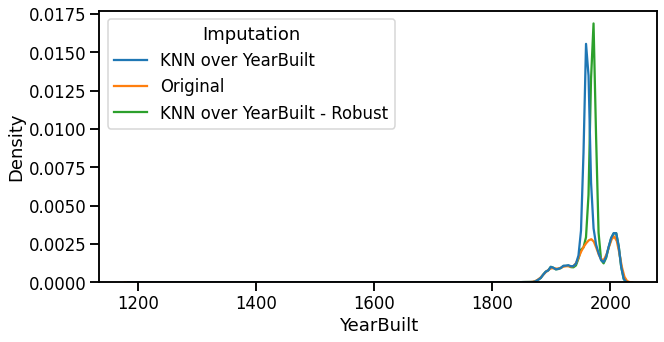

In [26]:
fig = plt.figure(figsize=(10, 5))
g = sns.kdeplot(data=df_YB2, x='YearBuilt', hue='Imputation')

### * Combinación de RobustScaler() - Imputación por KNN - `BuildingArea`:

In [ ]:
# from sklearn import preprocessing 

# melb_data_s = melb_df.copy(deep=True)
melb_BuildingArea = melb_data_s.BuildingArea.to_frame()
scaler = preprocessing.RobustScaler()
robust_df_BA = scaler.fit_transform(melb_BuildingArea)
robust_df_BA = pd.DataFrame(robust_df_BA, columns =['BuildingArea'])

fig,(ax1, ax2) = plt.subplots(ncols = 2, figsize =(12, 5)) 
ax1.set_title('Antes de Robust Scaling - BuildingArea') 
  
sns.kdeplot(melb_BuildingArea['BuildingArea'], ax = ax1, color ='r') 
ax2.set_title('Después de Robust Scaling - BuildingArea')  
sns.kdeplot(robust_df_BA['BuildingArea'], ax = ax2, color ='red') 
plt.show() 


In [ ]:
imputer_BuildA = IterativeImputer(random_state=0, estimator=KNeighborsRegressor(),n_nearest_features=5)
prueba_BA = robust_df_BA['BuildingArea'].values.copy().reshape(-1,1)
scaled_knn_BuildA = imputer_BuildA.fit_transform(prueba_BA)

In [ ]:
building_area2 = pd.DataFrame(scaler.inverse_transform(scaled_knn_BuildA)[:, [0]], columns =['BuildingArea'])
building_area2['Imputation'] = 'KNN over BuildingArea - Robust'

df_build2 = pd.concat([df_build, building_area2])
df_build2 = df_build2.reset_index()
df_build2.head(1)

# Grafico 
fig = plt.figure(figsize=(10, 5))
g = sns.kdeplot(data=df_build2, x='BuildingArea', hue='Imputation')

### * Conclusiones:
### -  De los anteriores se puede inferir que al aplicar el escalado robusto puntualmente para las columnas `BuildingArea` y `YearBuilt`, no se obtuvo mejoras sobre la estimación del KNN. Dado que la predicción sobre estima tanto los valores sin escalar y los originales.
### - Se hace necesario una aplicacion de algun método de escalado pero aplicado sobre todo el conjunto.

## Ejercicio 3: Reducción de dimensionalidad.

Utilizando la matriz obtenida en el ejercicio anterior:
1. Aplique `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos?
2. Grafique la varianza capturada por los primeros $n$ componentes principales, para cada $n$.
3. En base al gráfico, seleccione las primeras $m$ columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

## Ejercicio 4: Composición del resultado

Transformar nuevamente el conjunto de datos procesado en un `pandas.DataFrame` y guardarlo en un archivo.

Para eso, será necesario recordar el nombre original de cada columna de la matriz, en el orden correcto. Tener en cuenta:
1. El método `OneHotEncoder.get_feature_names` o el atributo `OneHotEncoder.categories_` permiten obtener una lista con los valores de la categoría que le corresponde a cada índice de la matriz.
2. Ninguno de los métodos aplicados intercambia de lugar las columnas o las filas de la matriz.

In [ ]:
## Small example
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

## If we process our data with the following steps:
categorical_cols = ['Type', 'Regionname']
numerical_cols = ['Rooms', 'Distance']
new_columns = []

# Step 1: encode categorical columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_cat = encoder.fit_transform(melb_df[categorical_cols])
for col, col_values in zip(categorical_cols, encoder.categories_):
  for col_value in col_values:
    new_columns.append('{}={}'.format(col, col_value))
print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))

# Step 2: Append the numerical columns
X = numpy.hstack([X_cat, melb_df[numerical_cols].values])
new_columns.extend(numerical_cols)
print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))

# Step 3: Append some new features, like PCA
pca = PCA(n_components=2)
pca_dummy_features = pca.fit_transform(X)
X_pca = numpy.hstack([X, pca_dummy_features])
new_columns.extend(['pca1', 'pca2'])

## Re-build dataframe
processed_melb_df = pd.DataFrame(data=X_pca, columns=new_columns)
processed_melb_df.head()

## Ejercicio 5: Documentación

En un documento `.pdf` o `.md` realizar un reporte de las operaciones que realizaron para obtener el conjunto de datos final. Se debe incluir:
  1. Criterios de exclusión (o inclusión) de filas
  2. Interpretación de las columnas presentes
  2. Todas las transofrmaciones realizadas

Este documento es de uso técnico exclusivamente, y su objetivo es permitir que otres desarrolladores puedan reproducir los mismos pasos y obtener el mismo resultado. Debe ser detallado pero consiso. Por ejemplo:

```
  ## Criterios de exclusión de ejemplos
  1. Se eliminan ejemplos donde el año de construcción es previo a 1900

  ## Características seleccionadas
  ### Características categóricas
  1. Type: tipo de propiedad. 3 valores posibles
  2. ...
  Todas las características categóricas fueron codificadas con un
  método OneHotEncoding utilizando como máximo sus 30 valores más 
  frecuentes.
  
  ### Características numéricas
  1. Rooms: Cantidad de habitaciones
  2. Distance: Distancia al centro de la ciudad.
  3. airbnb_mean_price: Se agrega el precio promedio diario de 
     publicaciones de la plataforma AirBnB en el mismo código 
     postal. [Link al repositorio con datos externos].

  ### Transformaciones:
  1. Todas las características numéricas fueron estandarizadas.
  2. La columna `Suburb` fue imputada utilizando el método ...
  3. Las columnas `YearBuilt` y ... fueron imputadas utilizando el 
     algoritmo ...
  4. ...

  ### Datos aumentados
  1. Se agregan las 5 primeras columnas obtenidas a través del
     método de PCA, aplicado sobre el conjunto de datos
     totalmente procesado.
```
